# Logistic Regression via Gradient Descent

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from data import read_logistic_data_sets
from nn import Logistic
from tools import train

def experiment(class_1, class_2, initial_rate, T,
               epoch_min, epoch_max, early_stopping):
    
    # Annealing
    def rate(t):
        return initial_rate / (1 + t / T)
    
    # Train
    dss = read_logistic_data_sets(class_1, class_2)
    print('Training set size:', dss.train.size)
    print('Hold-out set size:', dss.validation.size)
    print('Test set size:', dss.test.size)
    results = train(Logistic, dss, rate=rate,
                    epoch_min=epoch_min, epoch_max=epoch_max,
                    early_stopping=early_stopping)
    
    # Plot
    label = '{}{}'.format(class_1, class_2)
    
    results.plot_loss_function()
    plt.savefig('figs/logistic_{}_E.pdf'.format(label))
    plt.ylim(0, 3)
    plt.savefig('figs/logistic_{}_E_zoom.pdf'.format(label))
    plt.plot()
    
    results.plot_percent_correct()
    plt.savefig('figs/logistic_{}_c.pdf'.format(label))
    plt.ylim(0.9, 1)
    plt.savefig('figs/logistic_{}_c_zoom.pdf'.format(label))
    plt.plot()
    
    return results

## 2 vs 3

Training set size: 3582
Hold-out set size: 423
Test set size: 426


/Users/qobilidop/Dropbox/CSE-253-PA/1/nn.py:38: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


CPU times: user 1min 37s, sys: 20.6 s, total: 1min 57s
Wall time: 1min 5s


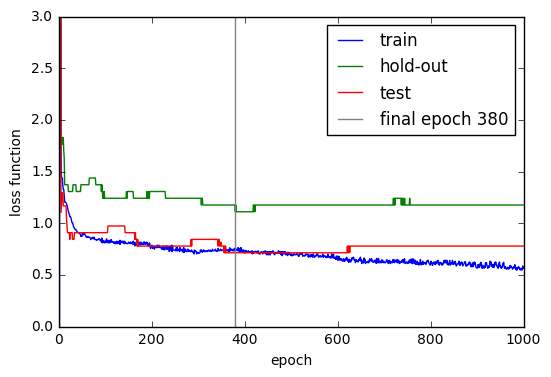

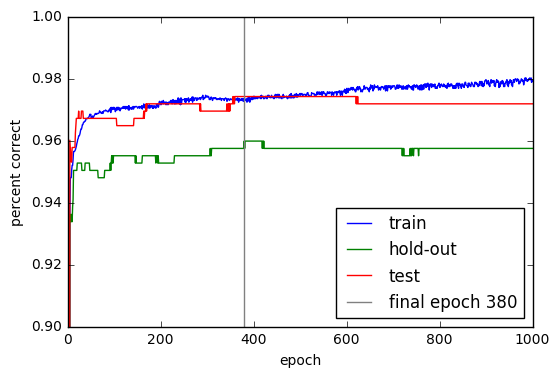

In [2]:
%%time
r23 = experiment(2, 3, initial_rate=1e-3, T=42,
                 epoch_min=500, epoch_max=1000, early_stopping=3)

## 2 vs 8

Training set size: 3472
Hold-out set size: 379
Test set size: 411


/Users/qobilidop/Dropbox/CSE-253-PA/1/nn.py:38: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


CPU times: user 1min 36s, sys: 20.5 s, total: 1min 56s
Wall time: 1min 5s


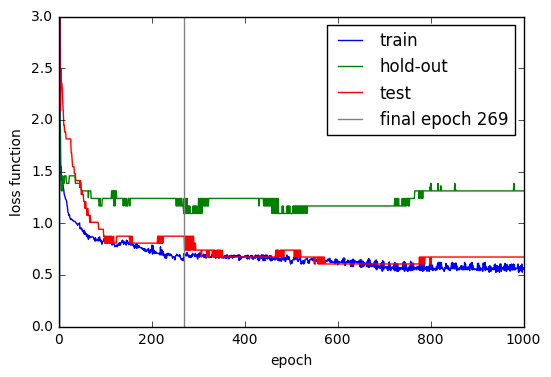

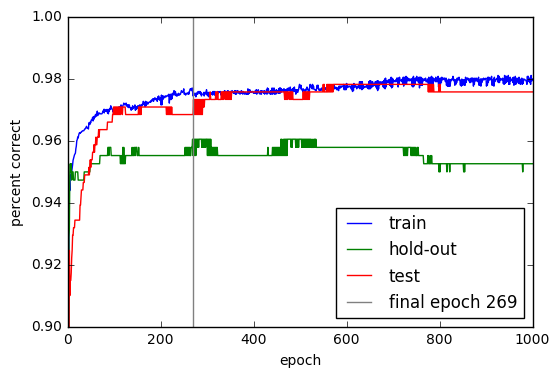

In [3]:
%%time
r28 = experiment(2, 8, initial_rate=1e-3, T=42,
                 epoch_min=500, epoch_max=1000, early_stopping=3)

## Weights Plots

In [4]:
def plot_weights(w):
    w = w[1:]
    side = int(len(w) ** 0.5)
    w = w.reshape((side, side))
    plt.imshow(w, interpolation='nearest')
    plt.colorbar()

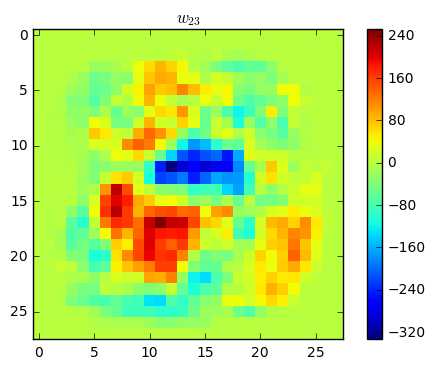

In [10]:
plot_weights(r23.final_weights)
plt.title('$w_{23}$')
plt.savefig('figs/w23.pdf')

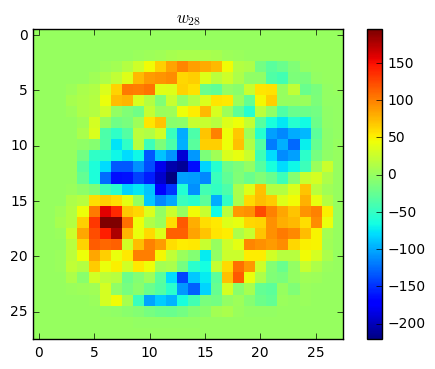

In [11]:
plot_weights(r28.final_weights)
plt.title('$w_{28}$')
plt.savefig('figs/w28.pdf')

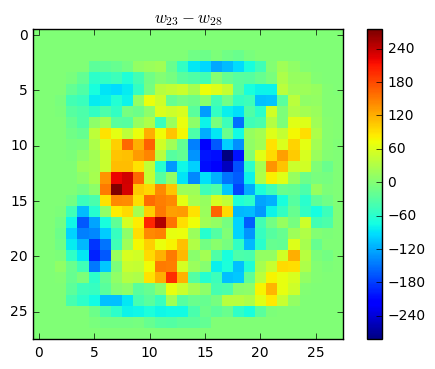

In [12]:
plot_weights(r23.final_weights - r28.final_weights)
plt.title('$w_{23}-w_{28}$')
plt.savefig('figs/w23-w28.pdf')

Training set size: 3592
Hold-out set size: 406
Test set size: 399


/Users/qobilidop/Dropbox/CSE-253-PA/1/nn.py:38: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


CPU times: user 1min 37s, sys: 20.4 s, total: 1min 57s
Wall time: 1min 5s


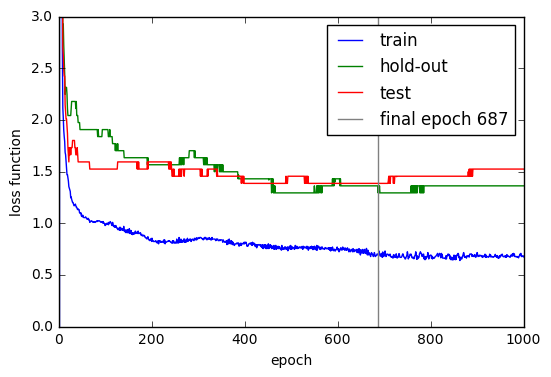

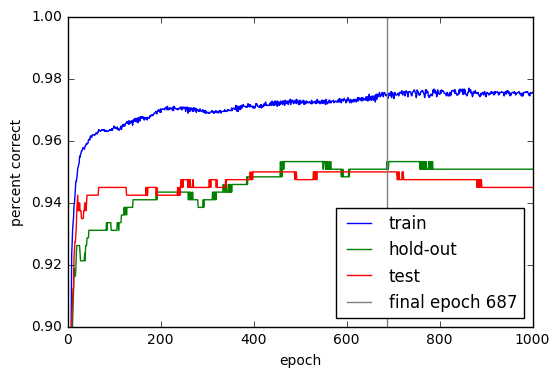

In [8]:
%%time
r83 = experiment(8, 3, initial_rate=1e-3, T=42,
                 epoch_min=500, epoch_max=1000, early_stopping=3)

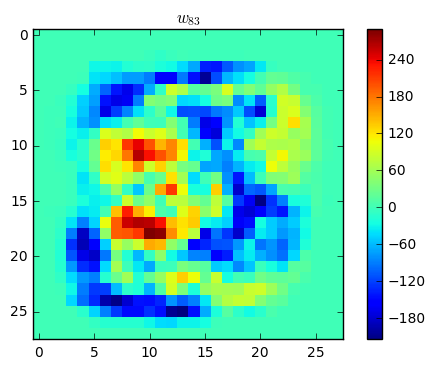

In [13]:
plot_weights(r83.final_weights)
plt.title('$w_{83}$')
plt.savefig('figs/w83.pdf')